In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [2]:
df = pd.read_csv('Gaming_Data_Cleaned_Draft1.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,Game Title,Weekly Sales,All Time Sales,Weeks Out,Genre,Console,Publisher,Count
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294


In [4]:
df = df.rename(columns={'Game Title':'Game_Title', 'Weekly Sales': 'Weekly_Sales', 'All Time Sales': 'All_Time_Sales',
                        'Weeks Out': 'Weeks_Out'})

In [5]:
pub_dummies = pd.get_dummies(df["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df["Console"], prefix="con")

In [6]:
df = pd.concat([df, pub_dummies, gen_dummies, con_dummies], axis=1)
df.head()

,Game_Title,Weekly_Sales,All_Time_Sales,Weeks_Out,Genre,Console,Publisher,Count,pub_505 Games,pub_Activision,...,gen_Strategy,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_WiiU,con_X360,con_XOne
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709,0,0,...,0,1,0,0,0,0,0,0,0,0
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294,0,1,...,0,0,0,0,0,1,0,0,0,0


In [7]:
#need to change column names for the dummy publishers because of spaces
cleaned_dummies = []
for names in list(df.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
dict(zip(list(df.columns[5:]), cleaned_dummies))

{'Console': 'Console',
 'Publisher': 'Publisher',
 'Count': 'Count',
 'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Aksys Games': 'pub_Aksys_Games',
 'pub_Aqua Plus': 'pub_Aqua_Plus',
 'pub_Aquaplus': 'pub_Aquaplus',
 'pub_Arc System Works': 'pub_Arc_System_Works',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Big Ben Interactive': 'pub_Big_Ben_Interactive',
 'pub_Broccoli': 'pub_Broccoli',
 'pub_Capcom': 'pub_Capcom',
 'pub_Capcom Entertainment': 'pub_Capcom_Entertainment',
 'pub_City Interactive': 'pub_City_Interactive',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Compile Heart': 'pub_Compile_Heart',
 'pub_D3Publisher ': 'pub_D3Publisher_',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Falcom': 'pub_Falcom',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'p

In [8]:
df = df.rename(columns={'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Sega': 'pub_Sega',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Interactive_Entertainment',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [9]:
dummy = ''
for names in cleaned_dummies:
    dummy += names
    dummy += '+'
dummy

'Console+Publisher+Count+pub_505_Games+pub_Activision+pub_Aksys_Games+pub_Aqua_Plus+pub_Aquaplus+pub_Arc_System_Works+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Big_Ben_Interactive+pub_Broccoli+pub_Capcom+pub_Capcom_Entertainment+pub_City_Interactive+pub_Codemasters+pub_Compile_Heart+pub_D3Publisher_+pub_Deep_Silver+pub_Electronic_Arts+pub_Falcom+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_FuRyu_Corporation+pub_Gearbox_Software+pub_Grey_Box+pub_Gun_Media+pub_Kadokawa_Games+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Marvelous+pub_Marvelous_Interactive+pub_Maximum_Games+pub_Merge_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Milestone+pub_Milestone_S.r.l.+pub_Mojang+pub_Namco_Bandai_Games+pub_Natsume+pub_Nicalis+pub_Nighthawk_Interactive+pub_Nihon_Falcom_Corporation+pub_Nintendo+pub_Nippon_Ichi_Software+pub_PQube+pub_Ready_at_Dawn+pub_Rebellion_Developments+pub_Screenlife+pub_Sega+pub_Sold_Out+pub_Sony_Computer_Enter

In [10]:
form = ('All_Time_Sales~Weeks_Out+Weekly_Sales+pub_Activision+pub_Atlus+' +
'+pub_Bethesda_Softworks+pub_Capcom+pub_Deep_Silver+' +
'pub_Electronic_Arts+pub_Gearbox_Software+' +
'pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+' +
'pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Sega+' +
'pub_Sony_Computer_Entertainment+pub_Square_Enix+pub_Studio_Wildcard+' +
'pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft++gen_Action+' +
'gen_ActionAdventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+' +
'gen_Racing+gen_RolePlaying+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Strategy+con_NS+con_PC+' +
'con_PS4+con_WiiU+con_X360+con_XOne')




In [11]:
"'pub_Bandai_Namco_Entertainment','pub_Focus_Home_Interactive', 'pub_Konami_Digital_Entertainment', 
'pub_Rebellion_Developments', 'pub_Sony_Interactive_Entertainment', 'pub_Warner_Bros_Interactive_Entertainment',
'gen_Platform','con_PSV'"

SyntaxError: EOL while scanning string literal (<ipython-input-11-4fa3a2dd04a0>, line 1)

In [12]:
df = df.drop(['pub_Bandai_Namco_Entertainment','pub_Focus_Home_Interactive', 'pub_Konami_Digital_Entertainment', 
'pub_Rebellion_Developments', 'pub_Sony_Interactive_Entertainment', 'pub_Warner_Bros_Interactive_Entertainment',
'gen_Platform','con_PSV'], axis=1)

In [13]:
df = df[df['Weeks_Out'] <= 250]

In [14]:
df = df.drop(['pub_Codemasters','pub_Frontier_Developments', 'pub_Koch_Media', 'gen_Puzzle', 'gen_Sports',
             'con_PS3'], axis =1)

In [15]:
lr_model = ols(formula=form, data=df).fit()

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:12:32   Log-Likelihood:                -49626.
No. Observations:                3075   AIC:                         9.934e+04
Df Residuals:                    3032   BIC:                         9.960e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.189e+05   3.11e+05      1.024      0.306   -2.92e+05    9.29e+05
Weeks_Out                        5.983e+04   1505.626     39.740      0.000    5.69e+04    6.28e+04
Weekly_Sales                        0.8923      0.180      4.964      0.000       0.540       1.245
pub_Activision                   2.642e+06   2.28e+05     11.593      0.000    2.19e+06    3.09e+06
pub_Atlus                       -1.706e+06   9.79e+05     -1.742      0.082   -3.62e+06    2.14e+05
pub_Bethesda_Softworks          -6.822e+05   3.45e+05     -1.977      0.048   -1.36e+06   -5483.428
pub_Capcom                      -4.406e+05      3e+05     -1.467      0.142   -1.03e+06    1.48e+05
pub_Deep_Silver                 -1.946e+06   6.16e+05     -3.157      0.002   -3.15e+06   -7.37e+05
pub_Electronic_Arts              2.711e+06   2.06e+05     13.191      0.000    2.31e+06    3.11e+06
pub_Gearbox_Software            -2.705e+06   7.64e+05     -3.541      0.000    -4.2e+06   -1.21e+06
pub_Level_5                     -1.349e+06    7.2e+05     -1.875      0.061   -2.76e+06    6.18e+04
pub_Maximum_Games               -1.519e+06   8.94e+05     -1.699      0.089   -3.27e+06    2.34e+05
pub_Microsoft_Game_Studios       1.495e+06   6.42e+05      2.328      0.020    2.36e+05    2.75e+06
pub_Microsoft_Studios            9.426e+05   3.28e+05      2.871      0.004    2.99e+05    1.59e+06
pub_Mojang                       4.623e+05   2.68e+05      1.726      0.084   -6.29e+04    9.87e+05
pub_Namco_Bandai_Games          -6.875e+05   3.12e+05     -2.204      0.028    -1.3e+06    -7.6e+04
pub_Nintendo                     3.294e+06   2.56e+05     12.844      0.000    2.79e+06     3.8e+06
pub_Sega                        -1.553e+06   4.75e+05     -3.269      0.001   -2.48e+06   -6.21e+05
pub_Sony_Computer_Entertainment  9.636e+05    4.3e+05      2.241      0.025    1.21e+05    1.81e+06
pub_Square_Enix                 -9.369e+05   2.81e+05     -3.329      0.001   -1.49e+06   -3.85e+05
pub_Studio_Wildcard             -1.832e+06   1.12e+06     -1.634      0.102   -4.03e+06    3.67e+05
pub_TakeTwo_Interactive          1.807e+06   2.31e+05      7.836      0.000    1.35e+06    2.26e+06
pub_Tecmo_Koei                    -1.9e+06   5.76e+05     -3.300      0.001   -3.03e+06   -7.71e+05
pub_Ubisoft                     -5.637e+05   2.06e+05     -2.738      0.006   -9.67e+05    -1.6e+05
gen_Action                       1.393e+06   1.83e+05      7.614      0.000    1.03e+06    1.75e+06
gen_ActionAdventure              1.195e+06    2.1e+05      5.694      0.000    7.83e+05    1.61e+06
gen_Adventure                   -1.411e+06   3.94e+05     -3.580      0.000   -2.18e+06   -6.38e+05
gen_Fighting                     -2.25e+05   2.68e+05     -0.841      0.401    -7.5

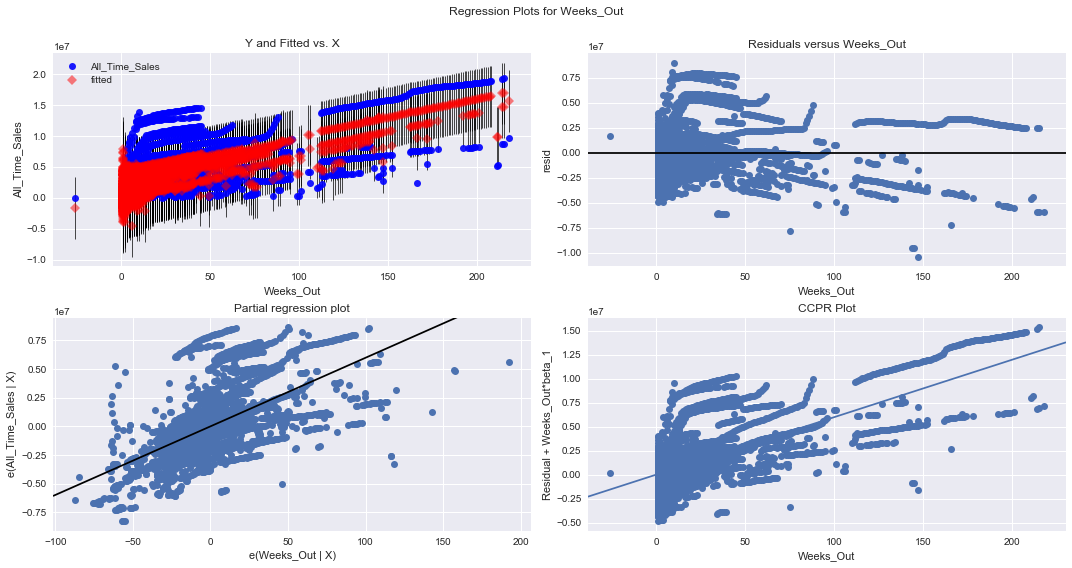

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

In [ ]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
plt.scatter(df.Weeks_Out,df.All_Time_Sales, label = 'Weeks Out');
plt.legend();
plt.xlabel('Number of Weeks Since Release')
plt.ylabel('Sales in Ten Millions')
plt.xlim(0, 200)
plt.title('Linearity Check')